### 1.4: Some statistics with pandas

In [1]:
# import moduled
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Stav/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#### 1. Load in the SF crimes dataset:

In [10]:
crime = pd.read_csv('../../assets/datasets/sf_crime.csv')

#### 2. Print the head

In [11]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2003-03-23 23:27:00,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,0 Block of HUNTERS PT EXPWY EX,-122.376945,37.733018
1,2006-03-07 06:45:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,0 Block of MARINA BL,-122.432952,37.805052
2,2004-03-06 03:00:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
3,2011-12-03 12:10:00,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,TARAVAL,"ARREST, BOOKED",3200 Block of 20TH AV,-122.475647,37.728528
4,2003-01-10 00:15:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,NORTHERN,NONE,POLK ST / BROADWAY ST,-122.421772,37.795946


#### 3. Print the unique categories and how many there are

In [18]:
unique_categories = crime['Category'].value_counts().index.values
print unique_categories, len(unique_categories)
#crime.groupby('Category').count()

['LARCENY/THEFT' 'OTHER OFFENSES' 'NON-CRIMINAL' 'ASSAULT' 'DRUG/NARCOTIC'
 'VEHICLE THEFT' 'VANDALISM' 'WARRANTS' 'BURGLARY' 'SUSPICIOUS OCC'
 'MISSING PERSON' 'ROBBERY' 'FRAUD' 'SECONDARY CODES'
 'FORGERY/COUNTERFEITING' 'WEAPON LAWS' 'PROSTITUTION' 'TRESPASS'
 'STOLEN PROPERTY' 'SEX OFFENSES FORCIBLE' 'DRUNKENNESS'
 'DISORDERLY CONDUCT' 'RECOVERED VEHICLE' 'DRIVING UNDER THE INFLUENCE'
 'KIDNAPPING' 'RUNAWAY' 'ARSON' 'LIQUOR LAWS' 'LOITERING' 'EMBEZZLEMENT'
 'BAD CHECKS' 'FAMILY OFFENSES' 'SUICIDE' 'EXTORTION' 'BRIBERY' 'GAMBLING'
 'SEX OFFENSES NON FORCIBLE' 'TREA'] 38


#### 4. Print the unique districts and how many there are

In [5]:
unique_districts = crime['PdDistrict'].value_counts().index.values

print " - ".join(unique_districts)
print len(unique_districts)



SOUTHERN - MISSION - NORTHERN - BAYVIEW - CENTRAL - TENDERLOIN - INGLESIDE - TARAVAL - PARK - RICHMOND
10


#### 5. Make a DataFrame of the crime categories and the number of crimes per category

In [6]:
pd.DataFrame(crime['Category'].value_counts())


,Category
LARCENY/THEFT,4934
OTHER OFFENSES,3656
NON-CRIMINAL,2601
ASSAULT,2164
DRUG/NARCOTIC,1533
VEHICLE THEFT,1506
VANDALISM,1280
WARRANTS,1239
BURGLARY,1023
SUSPICIOUS OCC,891


#### 6. Make a DataFrame of the districts and crime counts per district

            PdDistrict
SOUTHERN          4413
MISSION           3416
NORTHERN          3076
BAYVIEW           2555
CENTRAL           2424
TENDERLOIN        2336
INGLESIDE         2256
TARAVAL           1804
PARK              1438
RICHMOND          1282
(10, 1)
Index([u'SOUTHERN', u'MISSION', u'NORTHERN', u'BAYVIEW', u'CENTRAL',
       u'TENDERLOIN', u'INGLESIDE', u'TARAVAL', u'PARK', u'RICHMOND'],
      dtype='object')
(10, 2)
{'CENTRAL': (0.8, 0.7254901960784313, 0.4549019607843137), 'NORTHERN': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), 'INGLESIDE': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 'SOUTHERN': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 'MISSION': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), 'TENDERLOIN': (0.39215686274509803, 0.7098039215686275, 0.803921568627451), 'RICHMOND': (0.5058823529411764, 0.4470588235294118, 0.6980392156862745), 'TARAVAL': (0.3333333333333333, 0.6588235294117647, 0.407843137

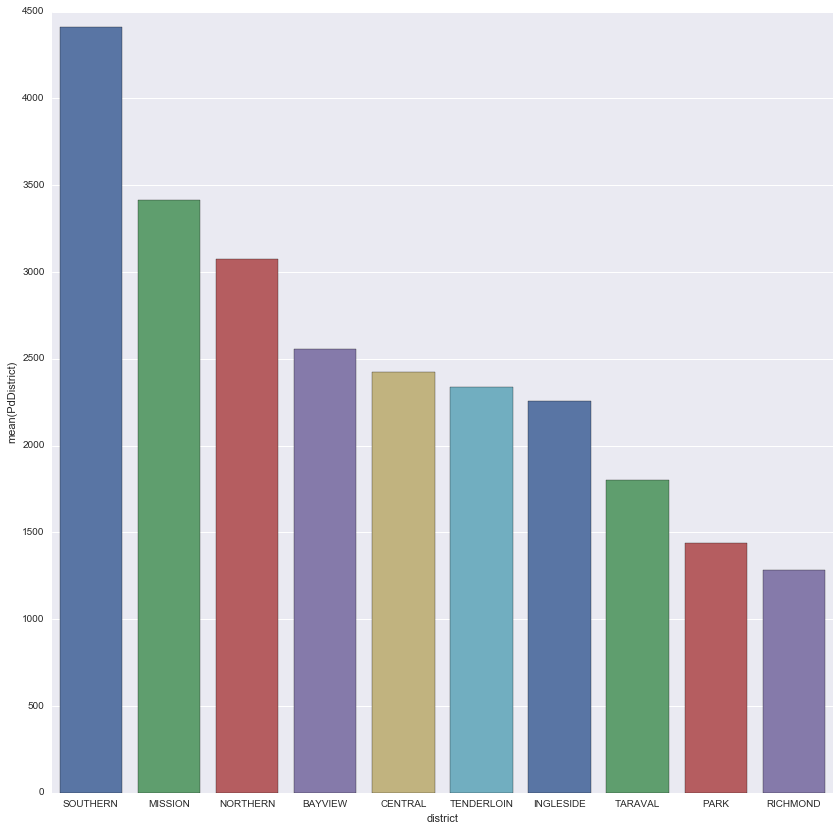

In [63]:
district_counts = pd.DataFrame(crime['PdDistrict'].value_counts())
print district_counts
print district_counts.shape
print district_counts.index

district_counts['district'] = district_counts.index.values
print district_counts.shape

p = {k:c for k,c in zip(district_counts.district.values, sns.color_palette(n_colors=district_counts.shape[0]))}
print p
                      
sns.set(rc={"figure.figsize": (14, 14)})
ax = sns.barplot(x='district', y='PdDistrict', data=district_counts,
                 palette=district_counts.district.map(p))




#### 7. Make a DataFrame of the day of week and crime counts per day

In [22]:
# crime and categories per index
crime.groupby(['DayOfWeek','PdDistrict']).count()

Dates  Category  Descript  Resolution  Address    X    Y
DayOfWeek PdDistrict                                                          
Friday    BAYVIEW       381       381       381         381      381  381  381
          CENTRAL       407       407       407         407      407  407  407
          INGLESIDE     350       350       350         350      350  350  350
          MISSION       536       536       536         536      536  536  536
          NORTHERN      496       496       496         496      496  496  496
          PARK          241       241       241         241      241  241  241
          RICHMOND      190       190       190         190      190  190  190
          SOUTHERN      697       697       697         697      697  697  697
          TARAVAL       265       265       265         265      265  265  265
          TENDERLOIN    320       320       320         320      320  320  320
Monday    BAYVIEW       394       394       394         394      394  394  394
          CENTRAL       299       299       299         299      299  299  299
          INGLESIDE     330       330       330         330      330  330  330
          MISSION       504       504       504         504      504  504  504
          NORTHERN      458       458       458         458      458  458  458
          PARK          195       195       195         195      195  195  195
          RICHMOND      163       163       163         163      163  163  163
          SOUTHERN      587       587       587         587      587  587  587
          TARAVAL       248       248       248         248      248  248  248
          TENDERLOIN    346       346       346         346      346  346  346
Saturday  BAYVIEW       343       343       343         343      343  343  343
          CENTRAL       402       402       402         402      402  402  402
          INGLESIDE     295       295       295         295      295  295  295
          MISSION       446       446       446         446      446  446  446
          NORTHERN      423       423       423         423      423  423  423
          PARK          213       213       213         213      213  213  213
          RICHMOND      185       185       185         185      185  185  185
          SOUTHERN      641       641       641         641      641  641  641
          TARAVAL       263       263       263         263      263  263  263
          TENDERLOIN    285       285       285         285      285  285  285
...                     ...       ...       ...         ...      ...  ...  ...
Thursday  BAYVIEW       369       369       369         369      369  369  369
          CENTRAL       330       330       330         330      330  330  330
          INGLESIDE     317       317       317         317      317  317  317
          MISSION       518       518       518         518      518  518  518
          NORTHERN      417       417       417         417      417  417  417
          PARK          204       204       204         204      204  204  204
          RICHMOND      203       203       203         203      203  203  203
          SOUTHERN      636       636       636         636      636  636  636
          TARAVAL       244       244       244         244      244  244  244
          TENDERLOIN    341       341       341         341      341  341  341
Tuesday   BAYVIEW       350       350       350         350      350  350  350
          CENTRAL       296       296       296         296      296  296  296
          INGLESIDE     318       318       318         318      318  318  318
          MISSION       498       498       498         498      498  498  498
          NORTHERN      418       418       418         418      418  418  418
          PARK          180       180       180         180      180  180  180
          RICHMOND      182       182       182         182      182  182  182
          SOUTHERN      635       635       635         635      635  63

In [37]:
crime['Category']

0                     ARSON
1             LARCENY/THEFT
2              NON-CRIMINAL
3                  BURGLARY
4             LARCENY/THEFT
5            SUSPICIOUS OCC
6             VEHICLE THEFT
7                   ASSAULT
8                   ASSAULT
9                     FRAUD
10            DRUG/NARCOTIC
11            DRUG/NARCOTIC
12          SECONDARY CODES
13           OTHER OFFENSES
14           OTHER OFFENSES
15                  ASSAULT
16           SUSPICIOUS OCC
17           OTHER OFFENSES
18           MISSING PERSON
19           OTHER OFFENSES
20           OTHER OFFENSES
21            LARCENY/THEFT
22                  ASSAULT
23            DRUG/NARCOTIC
24            VEHICLE THEFT
25            DRUG/NARCOTIC
26             NON-CRIMINAL
27                VANDALISM
28           MISSING PERSON
29                  ROBBERY
                ...        
24970         LARCENY/THEFT
24971         LARCENY/THEFT
24972         DRUG/NARCOTIC
24973          NON-CRIMINAL
24974         LARCEN

#### 8. Describe one of the datasets

In [ ]:
crime.describe()

#### 9. Calculate the mean difference between the experimental and control below

In [ ]:
control = [4.8,17.3,7.0,10.8,9.4,2.6,9.0,9.6,12.7,8.5,15.8,11.0,9.7,13.1,6.3,4.4,7.8,
           9.9,7.8,7.7,12.8,13.2,6.1,7.1,6.4,11.7,11.8,6.3,14.4,9.8,14.9,11.4,9.1,10.4,
           13.2,10.0,13.5,10.1,15.0,8.8,5.3,15.1,7.6,9.9,4.9,9.2,12.3,12.1,6.9,8.3,7.0,
           6.1,13.4,11.5,6.0,12.3,5.6,14.7,3.7,7.6,10.9,10.3,10.3,10.2,7.1,6.3,13.2,9.9,
           10.6,9.8,4.9,16.9,9.1,6.7,12.2,8.2,10.1,15.5,11.9,9.7,7.9,13.4,10.6,7.9,13.1,
           11.9,11.6,2.9,13.9,14.4,8.6,7.6,8.3,12.0,5.2,7.1,13.6,6.5,9.9,14.8]

In [ ]:
experimental = [15.4,14.7,14.0,25.3,15.1,14.6,0.0,20.5,16.9,18.9,20.1,16.5,13.1,16.4,
                18.3,21.3,6.3,9.0,12.1,7.4,25.6,10.8,11.4,12.1,22.7,20.1,18.3,9.4,11.0,
                14.8,12.5,12.3,16.4,13.3,14.1,15.7,12.2,15.2,16.9,1.5,18.6,4.2,12.2,8.2,
                15.3,9.3,12.0,22.8,19.7,10.7,17.8,15.4,14.5,22.2,16.7,19.3,17.1,17.4,5.4,
                10.9,13.7,17.1,11.2,15.0,18.2,14.2,11.0,19.6,10.9,13.9,17.3,11.1,19.9,
                11.2,25.1,23.7,16.5,17.9,20.1,15.8,26.4,17.7,18.9,5.6,25.6,10.4,15.5,17.7,
                22.9,18.9,21.2,5.5,13.2,13.4,21.9,11.1,13.7,16.9,16.4,18.8 ]

#### 10. Calculate the t-statistic for the difference between means by hand (if you forgot it, look it up online or in the notes!)

The standard deviation component is the standard deviation across groups.

In [ ]:
import scipy
control_mean = np.mean(control)
exper_mean = np.mean(experimental)
control_std = np.std(control)
exper_std = np.std(experimental)
print 'control mean:', control_mean
print 'experimental mean:', exper_mean
print 'control std:', control_std
print 'experimental std:', exper_std

t_test = (exper_mean - control_mean)/((control_std+exper_std)/2)/np.sqrt(len(control))
print t_test
scipy.stats.ttest_ind(control,experimental)

#### 11. Plot the control and experimental distributions using seaborn on the same plot (with different colors for each)

In [ ]:
ax = sns.distplot(control, bins=10)
sns.distplot(experimental, color='darkred', bins=10, ax=ax)


#### 11. [BONUS] Write a function to bootstrap the 99% confidence interval for the t-statistic.

Look up: np.percentile!